In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_log(logfile, save=None):
    regex = re.compile("Epoch: \[.*/200\].*Time.*")
    x = []
    y = []
    with open(logfile, 'r') as f:
        for l in f.read().splitlines():
            if re.match(regex, l):
                m = re.search(r"Epoch: \[(.*?)/200\]", l)
                epoch = int(m.group(1))
                m = re.search(r".*Time(.*?)\(", l)
                epoch_time = float(m.group(1))
                x.append(epoch)
                y.append(epoch_time)
    return x, y

In [2]:
result_home = '/home/yuantingh/monai_result/'
x1, y1 = parse_log(result_home + '1415304/joblog.log')
x2, y2 = parse_log(result_home + '1416638/joblog.log')
x3, y3 = parse_log(result_home + '1411739/joblog.log')
x4, y4 = parse_log(result_home + '1416336/joblog.log')
y4 = (np.array(y4[::2]) + np.array(y4[1::2])) / 2

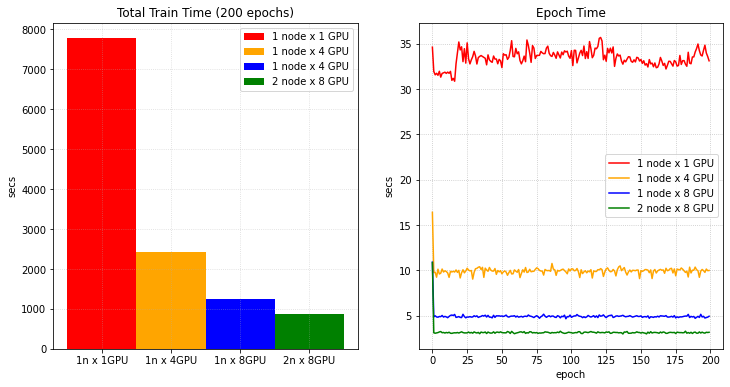

In [3]:
plt.figure('train', (12, 6))
plt.subplot(1, 2, 1)
plt.title('Total Train Time (200 epochs)')
plt.bar('1n x 1GPU', 7781, 1, label='1 node x 1 GPU', color='red')
plt.bar('1n x 4GPU', 2414, 1, label='1 node x 4 GPU', color='orange')
plt.bar('1n x 8GPU', 1255, 1, label='1 node x 4 GPU', color='blue')
plt.bar('2n x 8GPU', 877, 1, label='2 node x 8 GPU', color='green')
plt.ylabel('secs')
plt.grid(alpha=0.5, linestyle=':')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Epoch Time')
plt.xlabel('epoch')
plt.ylabel('secs')
plt.plot(x1, y1, label='1 node x 1 GPU', color='red')
plt.plot(x1, y2, label='1 node x 4 GPU', color='orange')
plt.plot(x1, y3, label='1 node x 8 GPU', color='blue')
plt.plot(x1, y4, label='2 node x 8 GPU', color='green')
plt.grid(alpha=0.8, linestyle=':')
plt.legend(loc='best')
plt.show()